<a href="https://colab.research.google.com/github/edsonhenriques/bootcamp_xp/blob/main/C%C3%B3pia_de_20_Tesouro_Direto_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

###Python para Investimentos - Tesouro Direto

**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

**Canal no Youtube:** https://www.youtube.com/ricospeloacaso?sub_confirmation=1

---


In [ ]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('U3zuklVH6k4', width=854, height=480)

##Importações e Configurações Iniciais

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

##1. Funções para Busca e Tratamento de  Dados do Tesouro Direto

In [ ]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

In [ ]:
def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

In [ ]:
def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

##2.Preços e Taxas Históricas dos Títulos Negociados

Essa conjunto de dados contém as taxas e preços dos títulos ofertados pelo Tesouro Direto. Refletem o mercado secundário de títulos públicos federais.

###2.1 Buscando dados

In [ ]:
titulos = busca_titulos_tesouro_direto()

In [ ]:
titulos.sort_index(inplace=True)
titulos

Taxa Compra Manha  ...  PU Base Manha
Tipo Titulo                        Data Vencimento Data Base                      ...               
Tesouro IGPM+ com Juros Semestrais 2005-07-01      2004-12-31               9.23  ...        1827.87
                                                   2005-01-03               9.23  ...        1776.51
                                                   2005-01-04               9.26  ...        1777.32
                                                   2005-01-05               9.28  ...        1778.20
                                                   2005-01-06               9.31  ...        1779.01
                                                   2005-01-07               9.87  ...        1775.73
                                                   2005-01-10              10.14  ...        1775.59
                                                   2005-01-11              10.26  ...        1775.79
                                                   2005-01-12              10.89  ...        1771.45
                                                   2005-01-13              10.89  ...        1772.52
...                                                                          ...  ...            ...
Tesouro Selic                      2025-03-01      2020-05-08               0.03  ...       10593.34
                                                   2020-05-11               0.03  ...       10594.57
                                                   2020-05-12               0.03  ...       10595.78
                                                   2020-05-13               0.03  ...       10597.00
                                                   2020-05-14               0.03  ...       10598.22
                                                   2020-05-15               0.03  ...       10599.44
                                                   2020-05-18               0.03  ...       10600.65
                                                   2020-05-19               0.03  ...       10601.88
                                                   2020-05-20               0.03  ...       10603.10
                                                   2020-05-21               0.03  ...       10604.31

[108759 rows x 5 columns]

In [ ]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Selic']

###2.2 Tesouro Selic

In [ ]:
selic2025 = titulos.loc[('Tesouro Selic', '2025-03-01')]
selic2025

Taxa Compra Manha  Taxa Venda Manha  ...  PU Venda Manha  PU Base Manha
Data Base                                        ...                               
2019-02-01               0.02              0.06  ...         9902.94        9900.45
2019-02-04               0.02              0.06  ...         9905.40        9902.91
2019-02-05               0.02              0.06  ...         9907.87        9905.36
2019-02-06               0.02              0.06  ...         9910.33        9907.83
2019-02-07               0.02              0.06  ...         9912.80        9910.29
2019-02-08               0.02              0.06  ...         9915.26        9912.76
2019-02-11               0.02              0.06  ...         9917.72        9915.22
2019-02-12               0.02              0.06  ...         9920.19        9917.68
2019-02-13               0.02              0.06  ...         9922.65        9920.15
2019-02-14               0.02              0.06  ...         9925.12        9922.62
...                       ...               ...  ...             ...            ...
2020-05-08               0.03              0.04  ...        10594.61       10593.34
2020-05-11               0.03              0.04  ...        10595.82       10594.57
2020-05-12               0.03              0.04  ...        10597.04       10595.78
2020-05-13               0.03              0.04  ...        10598.26       10597.00
2020-05-14               0.03              0.04  ...        10599.48       10598.22
2020-05-15               0.03              0.04  ...        10600.69       10599.44
2020-05-18               0.03              0.04  ...        10601.92       10600.65
2020-05-19               0.03              0.04  ...        10603.14       10601.88
2020-05-20               0.03              0.04  ...        10604.36       10603.10
2020-05-21               0.03              0.04  ...        10605.58       10604.31

[324 rows x 5 columns]

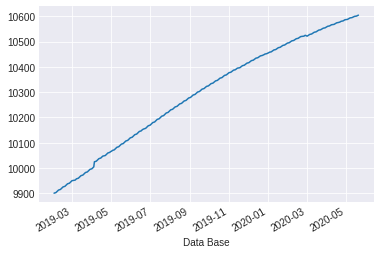

In [ ]:
selic2025['PU Base Manha'].plot();

###2.3 Pré-fixado 2023

In [ ]:
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023

Taxa Compra Manha  Taxa Venda Manha  ...  PU Venda Manha  PU Base Manha
Data Base                                        ...                               
2016-01-26              16.59             16.65  ...          345.49         345.28
2016-01-27              16.32             16.38  ...          351.27         351.06
2016-01-28              16.42             16.48  ...          349.41         349.20
2016-01-29              15.93             15.99  ...          359.92         359.71
2016-02-01              15.89             15.95  ...          360.99         360.78
2016-02-02              15.62             15.68  ...          367.04         366.83
2016-02-03              15.90             15.96  ...          361.20         360.99
2016-02-04              15.73             15.79  ...          365.07         364.86
2016-02-05              15.99             16.05  ...          359.70         359.49
2016-02-10              15.97             16.03  ...          360.34         360.13
...                       ...               ...  ...             ...            ...
2020-05-08               4.56              4.68  ...          886.14         885.98
2020-05-11               4.55              4.67  ...          886.52         886.36
2020-05-12               4.41              4.53  ...          889.81         889.66
2020-05-13               4.62              4.74  ...          885.28         885.12
2020-05-14               4.99              5.11  ...          877.28         877.11
2020-05-15               4.79              4.91  ...          881.85         881.68
2020-05-18               4.66              4.78  ...          884.89         884.72
2020-05-19               4.56              4.68  ...          887.26         887.10
2020-05-20               4.54              4.66  ...          887.87         887.71
2020-05-21               4.62              4.74  ...          886.26         886.10

[1074 rows x 5 columns]

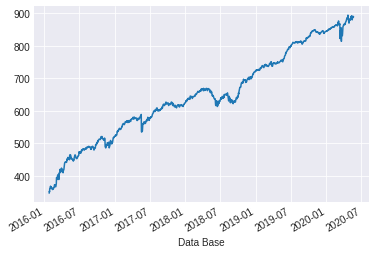

In [ ]:
pre2023['PU Compra Manha'].plot();

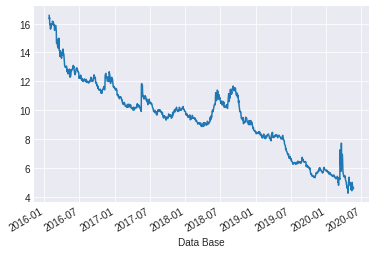

In [ ]:
pre2023['Taxa Compra Manha'].plot();

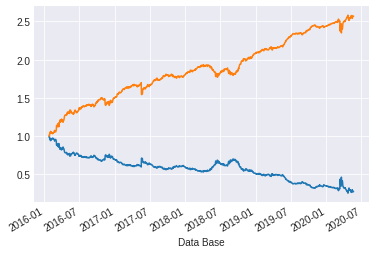

In [ ]:
(pre2023['Taxa Compra Manha'] / pre2023['Taxa Compra Manha'].iloc[0]).plot();
(pre2023['PU Compra Manha'] / pre2023['PU Compra Manha'].iloc[0]).plot();

###2.4 Pré-fixado 2026

In [ ]:
pre2026 = titulos.loc[('Tesouro Prefixado', '2026-01-01')]
pre2026

Taxa Compra Manha  Taxa Venda Manha  ...  PU Venda Manha  PU Base Manha
Data Base                                        ...                               
2020-02-10               6.36              6.48  ...          691.42         691.25
2020-02-11               6.26              6.38  ...          695.42         695.25
2020-02-12               6.22              6.34  ...          697.13         696.96
2020-02-13               6.28              6.40  ...          695.00         694.82
2020-02-14               6.23              6.35  ...          697.08         696.91
2020-02-17               6.19              6.31  ...          698.79         698.62
2020-02-18               6.21              6.33  ...          698.19         698.02
2020-02-19               6.24              6.36  ...          697.21         697.04
2020-02-20               6.21              6.33  ...          698.53         698.36
2020-02-21               6.28              6.40  ...          696.02         695.85
...                       ...               ...  ...             ...            ...
2020-05-08               7.09              7.21  ...          675.12         674.94
2020-05-11               7.14              7.26  ...          673.54         673.35
2020-05-12               6.93              7.05  ...          681.21         681.02
2020-05-13               7.23              7.35  ...          670.74         670.55
2020-05-14               7.57              7.69  ...          659.09         658.90
2020-05-15               7.36              7.48  ...          666.56         666.37
2020-05-18               7.26              7.38  ...          670.25         670.06
2020-05-19               7.17              7.29  ...          673.60         673.42
2020-05-20               7.14              7.26  ...          674.85         674.66
2020-05-21               7.19              7.31  ...          673.28         673.09

[69 rows x 5 columns]

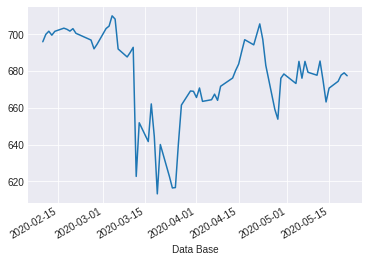

In [ ]:
pre2026['PU Compra Manha'].plot();

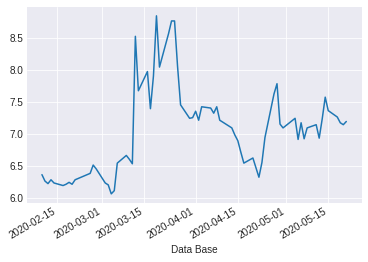

In [ ]:
pre2026['Taxa Compra Manha'].plot();

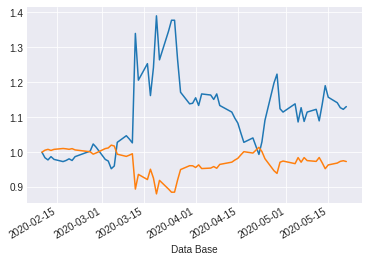

In [ ]:
(pre2026['Taxa Compra Manha'] / pre2026['Taxa Compra Manha'].iloc[0]).plot();
(pre2026['PU Compra Manha'] / pre2026['PU Compra Manha'].iloc[0]).plot();

###2.5 Pré-fixado 2031 com Juros Semestrais

In [ ]:
pre2031 = titulos.loc[('Tesouro Prefixado com Juros Semestrais', '2031-01-01')]
pre2031

Taxa Compra Manha  Taxa Venda Manha  ...  PU Venda Manha  PU Base Manha
Data Base                                        ...                               
2020-02-10               6.69              6.81  ...         1247.33        1247.00
2020-02-11               6.57              6.69  ...         1257.90        1257.57
2020-02-12               6.56              6.68  ...         1259.08        1258.76
2020-02-13               6.64              6.76  ...         1252.56        1252.23
2020-02-14               6.56              6.68  ...         1259.73        1259.40
2020-02-17               6.54              6.66  ...         1261.77        1261.45
2020-02-18               6.59              6.71  ...         1257.80        1257.48
2020-02-19               6.63              6.75  ...         1254.71        1254.39
2020-02-20               6.62              6.74  ...         1255.89        1255.56
2020-02-21               6.74              6.86  ...         1246.04        1245.71
...                       ...               ...  ...             ...            ...
2020-05-08               8.00              8.12  ...         1163.82        1163.46
2020-05-11               8.08              8.20  ...         1158.30        1157.94
2020-05-12               7.95              8.07  ...         1168.24        1167.88
2020-05-13               8.25              8.37  ...         1146.67        1146.30
2020-05-14               8.54              8.66  ...         1126.40        1126.02
2020-05-15               8.27              8.39  ...         1145.96        1145.59
2020-05-18               8.17              8.29  ...         1153.55        1153.19
2020-05-19               8.05              8.17  ...         1162.67        1162.31
2020-05-20               7.99              8.11  ...         1167.45        1167.09
2020-05-21               7.91              8.03  ...         1173.73        1173.37

[69 rows x 5 columns]

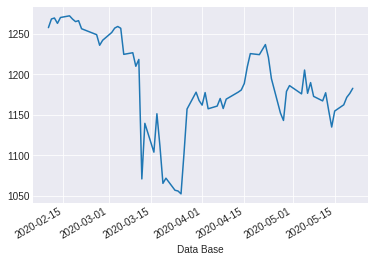

In [ ]:
pre2031['PU Compra Manha'].plot();

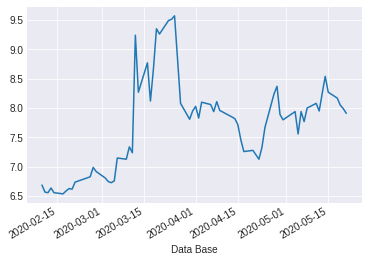

In [ ]:
pre2031['Taxa Compra Manha'].plot();

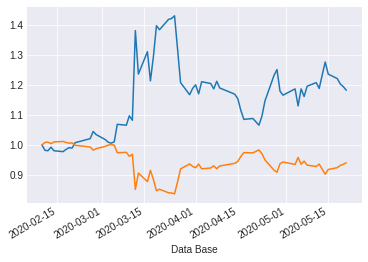

In [ ]:
(pre2031['Taxa Compra Manha'] / pre2031['Taxa Compra Manha'].iloc[0]).plot();
(pre2031['PU Compra Manha'] / pre2031['PU Compra Manha'].iloc[0]).plot();

###2.6 Tesouro IPCA+ 2026

In [ ]:
ipca2026 = titulos.loc[('Tesouro IPCA+', '2026-08-15')]
ipca2026

Taxa Compra Manha  Taxa Venda Manha  ...  PU Venda Manha  PU Base Manha
Data Base                                        ...                               
2020-02-10               2.65              2.77  ...         2764.50        2764.01
2020-02-11               2.58              2.70  ...         2777.24        2776.76
2020-02-12               2.56              2.68  ...         2781.23        2780.75
2020-02-13               2.58              2.70  ...         2778.20        2777.72
2020-02-14               2.54              2.66  ...         2785.97        2785.22
2020-02-17               2.49              2.61  ...         2795.20        2794.77
2020-02-18               2.53              2.65  ...         2788.58        2788.15
2020-02-19               2.56              2.68  ...         2783.74        2783.31
2020-02-20               2.50              2.62  ...         2794.70        2794.28
2020-02-21               2.55              2.67  ...         2786.99        2785.97
...                       ...               ...  ...             ...            ...
2020-05-08               3.53              3.65  ...         2639.73        2640.17
2020-05-11               3.53              3.65  ...         2639.83        2639.73
2020-05-12               3.42              3.54  ...         2657.51        2657.42
2020-05-13               3.56              3.68  ...         2635.27        2635.16
2020-05-14               3.69              3.81  ...         2614.84        2614.72
2020-05-15               3.53              3.65  ...         2639.57        2640.14
2020-05-18               3.43              3.55  ...         2655.56        2655.51
2020-05-19               3.35              3.47  ...         2668.43        2668.39
2020-05-20               3.31              3.43  ...         2674.90        2674.86
2020-05-21               3.25              3.37  ...         2684.62        2684.58

[69 rows x 5 columns]

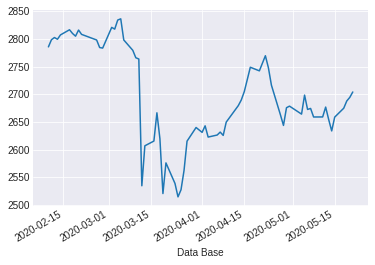

In [ ]:
ipca2026['PU Compra Manha'].plot();

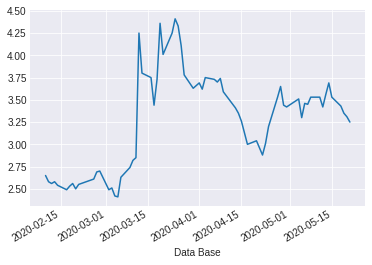

In [ ]:
ipca2026['Taxa Compra Manha'].plot();

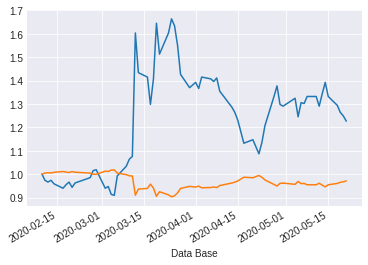

In [ ]:
(ipca2026['Taxa Compra Manha'] / ipca2026['Taxa Compra Manha'].iloc[0]).plot();
(ipca2026['PU Compra Manha'] / ipca2026['PU Compra Manha'].iloc[0]).plot();

###2.7 Tesouro IPCA+ 2035

In [ ]:
ipca2035 = titulos.loc[('Tesouro IPCA+', '2035-05-15')]
ipca2035

Taxa Compra Manha  Taxa Venda Manha  ...  PU Venda Manha  PU Base Manha
Data Base                                        ...                               
2010-03-08               6.23              6.33  ...          405.82         405.61
2010-03-09               6.25              6.35  ...          404.12         403.91
2010-03-10               6.25              6.35  ...          404.33         404.12
2010-03-11               6.25              6.35  ...          404.54         404.33
2010-03-12               6.27              6.37  ...          403.07         402.82
2010-03-15               6.28              6.38  ...          402.27         402.12
2010-03-16               6.27              6.37  ...          403.37         403.22
2010-03-17               6.26              6.36  ...          404.47         404.32
2010-03-18               6.26              6.36  ...          404.62         404.47
2010-03-19               6.22              6.32  ...          408.71         408.46
...                       ...               ...  ...             ...            ...
2020-05-08               4.47              4.59  ...         1687.85        1688.08
2020-05-11               4.52              4.64  ...         1675.95        1675.82
2020-05-12               4.43              4.55  ...         1697.79        1697.66
2020-05-13               4.61              4.73  ...         1654.80        1654.67
2020-05-14               4.77              4.89  ...         1617.59        1617.45
2020-05-15               4.62              4.74  ...         1652.28        1652.57
2020-05-18               4.52              4.64  ...         1676.14        1676.04
2020-05-19               4.47              4.59  ...         1688.25        1688.15
2020-05-20               4.42              4.54  ...         1700.44        1700.35
2020-05-21               4.40              4.52  ...         1705.40        1705.31

[2548 rows x 5 columns]

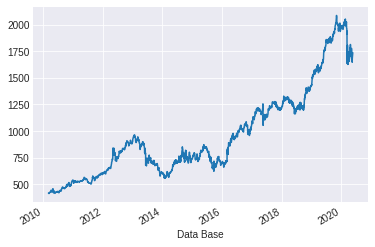

In [ ]:
ipca2035['PU Compra Manha'].plot();

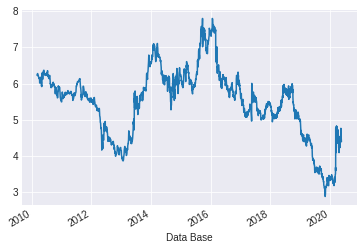

In [ ]:
ipca2035['Taxa Compra Manha'].plot();

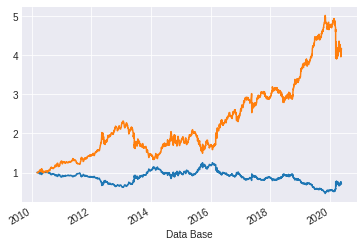

In [ ]:
(ipca2035['Taxa Compra Manha'] / ipca2035['Taxa Compra Manha'].iloc[0]).plot();
(ipca2035['PU Compra Manha'] / ipca2035['PU Compra Manha'].iloc[0]).plot();

###2.8 Tesouro IPCA+ 2045

In [ ]:
ipca2045 = titulos.loc[('Tesouro IPCA+', '2045-05-15')]
ipca2045

Taxa Compra Manha  Taxa Venda Manha  ...  PU Venda Manha  PU Base Manha
Data Base                                        ...                               
2017-02-08               5.34              5.46  ...          664.14         663.92
2017-02-09               5.27              5.39  ...          676.90         676.67
2017-02-10               5.21              5.33  ...          688.23         687.84
2017-02-13               5.21              5.33  ...          688.46         688.23
2017-02-14               5.22              5.34  ...          686.85         686.62
2017-02-15               5.22              5.34  ...          687.10         686.85
2017-02-16               5.25              5.37  ...          681.88         681.62
2017-02-17               5.32              5.44  ...          669.73         669.25
2017-02-20               5.27              5.39  ...          678.98         678.73
2017-02-21               5.25              5.37  ...          682.87         682.62
...                       ...               ...  ...             ...            ...
2020-05-08               4.47              4.59  ...         1078.88        1079.02
2020-05-11               4.52              4.64  ...         1066.18        1066.10
2020-05-12               4.43              4.55  ...         1089.38        1089.30
2020-05-13               4.61              4.73  ...         1043.74        1043.65
2020-05-14               4.77              4.89  ...         1004.86        1004.77
2020-05-15               4.62              4.74  ...         1041.16        1041.34
2020-05-18               4.52              4.64  ...         1066.30        1066.23
2020-05-19               4.47              4.59  ...         1079.13        1079.07
2020-05-20               4.42              4.54  ...         1092.12        1092.06
2020-05-21               4.40              4.52  ...         1097.40        1097.34

[813 rows x 5 columns]

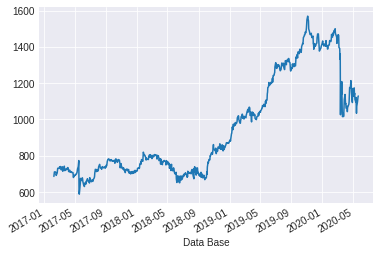

In [ ]:
ipca2045['PU Compra Manha'].plot();

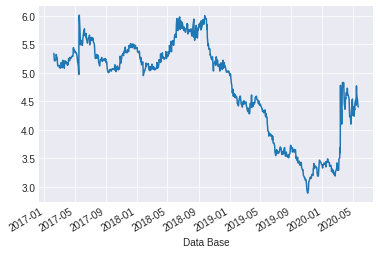

In [ ]:
ipca2045['Taxa Compra Manha'].plot();

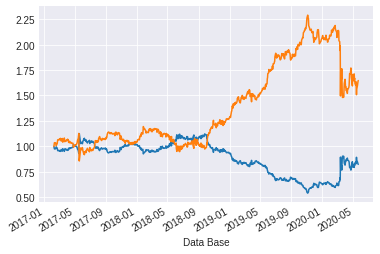

In [ ]:
(ipca2045['Taxa Compra Manha'] / ipca2045['Taxa Compra Manha'].iloc[0]).plot();
(ipca2045['PU Compra Manha'] / ipca2045['PU Compra Manha'].iloc[0]).plot();

###2.9 Tesouro IPCA+ 2055 com Juros Semestrais

In [ ]:
ipca2055 = titulos.loc[('Tesouro IPCA+ com Juros Semestrais', '2055-05-15')]
ipca2055

Taxa Compra Manha  Taxa Venda Manha  ...  PU Venda Manha  PU Base Manha
Data Base                                        ...                               
2020-02-10               3.42              3.54  ...         4956.73        4955.71
2020-02-11               3.36              3.48  ...         5010.64        5009.63
2020-02-12               3.36              3.48  ...         5011.66        5010.64
2020-02-13               3.40              3.52  ...         4977.32        4976.30
2020-02-14               3.37              3.49  ...         5005.31        5003.81
2020-02-17               3.34              3.46  ...         5032.93        5032.01
2020-02-18               3.37              3.49  ...         5007.16        5006.23
2020-02-19               3.37              3.49  ...         5008.08        5007.16
2020-02-20               3.34              3.46  ...         5035.70        5034.77
2020-02-21               3.43              3.55  ...         4958.31        4956.35
...                       ...               ...  ...             ...            ...
2020-05-08               4.50              4.62  ...         4180.23        4180.78
2020-05-11               4.52              4.64  ...         4167.37        4167.05
2020-05-12               4.42              4.54  ...         4234.21        4233.90
2020-05-13               4.50              4.62  ...         4181.18        4180.86
2020-05-14               4.67              4.79  ...         3974.03        4071.31
2020-05-15               4.55              4.67  ...         4050.36        4051.08
2020-05-18               4.48              4.60  ...         4096.61        4096.36
2020-05-19               4.45              4.57  ...         4116.80        4116.57
2020-05-20               4.44              4.56  ...         4123.73        4123.49
2020-05-21               4.43              4.55  ...         4130.66        4130.43

[69 rows x 5 columns]

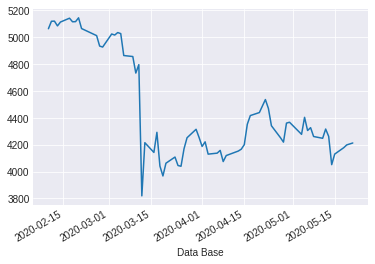

In [ ]:
ipca2055['PU Compra Manha'].plot();

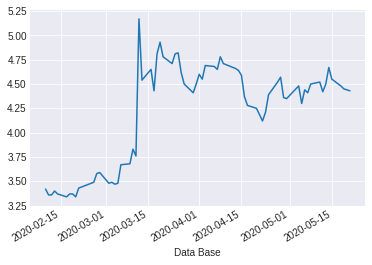

In [ ]:
ipca2055['Taxa Compra Manha'].plot();

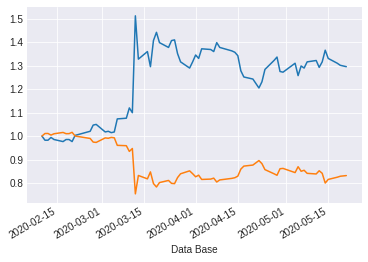

In [ ]:
(ipca2055['Taxa Compra Manha'] / ipca2055['Taxa Compra Manha'].iloc[0]).plot();
(ipca2055['PU Compra Manha'] / ipca2055['PU Compra Manha'].iloc[0]).plot();

##3. Vendas Tesouro Direto

Este conjunto de dados traz o volume de vendas diário do programa Tesouro Direto.

###3.1 Buscando Dados

In [ ]:
vendas = busca_vendas_tesouro()

In [ ]:
vendas.sort_index(inplace=True)
vendas

PU  ...        Valor
Tipo Titulo                        Vencimento do Titulo Data Venda                ...             
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07   1038.150000  ...      7682.31
                                                        2002-01-08   1035.590000  ...      6213.54
                                                        2002-01-09   1035.400000  ...       207.08
                                                        2002-01-14   1038.166666  ...       622.89
                                                        2002-01-15   1038.640000  ...      1038.64
                                                        2002-01-16   1039.052173  ...     19118.55
                                                        2002-01-17   1039.269911  ...     23487.49
                                                        2002-01-18   1039.259574  ...      9769.03
                                                        2002-01-21   1039.720000  ...     12476.64
                                                        2002-01-22   1040.189743  ...      8113.47
...                                                                          ...  ...          ...
Tesouro Selic                      2025-03-01           2020-05-07  10597.262817  ...  58759384.94
                                                        2020-05-08  10598.471191  ...  49202978.56
                                                        2020-05-11  10599.681197  ...  45618165.95
                                                        2020-05-12  10600.899691  ...  56769726.00
                                                        2020-05-13  10602.114034  ...  46886152.97
                                                        2020-05-14  10603.334453  ...  50568362.33
                                                        2020-05-15  10604.553721  ...  46165439.98
                                                        2020-05-18  10605.760877  ...  47806103.49
                                                        2020-05-19  10606.969027  ...  56743359.71
                                                        2020-05-20  10608.194896  ...  32362314.08

[63020 rows x 3 columns]

###3.2 Gráficos

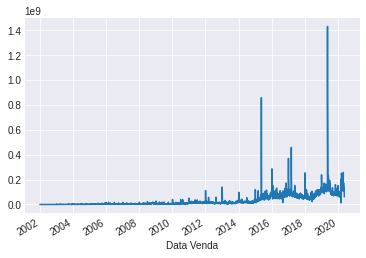

In [ ]:
vendas['Valor'].groupby('Data Venda').sum().plot();

##4. Recompras Tesouro Direto

Esse conjunto da dados contém listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título. Frequência: Atualização diária com dados até dois dias antes à data do arquivo.

###4.1 Buscando Dados

In [ ]:
recompras = busca_recompras_tesouro()

In [ ]:
recompras.sort_index(inplace=True)
recompras

Quantidade        Valor
Tipo Titulo                        Vencimento do Titulo Data Resgate                         
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13          2.00      3545.04
                                                        2005-02-03          1.00      1783.97
                                                        2005-03-03          2.00      3595.96
                                                        2005-03-10          1.00      1803.81
                                                        2005-03-24          0.20       364.14
                                                        2005-03-31          0.60      1098.15
                                                        2005-04-14          3.60      6666.62
                                                        2005-04-22         36.00     66912.84
                                                        2005-06-02          6.40     11999.94
                                   2005-12-01           2005-01-06        141.20    249321.07
...                                                                          ...          ...
Tesouro Selic                      2025-03-01           2020-05-07       1875.96  19870459.40
                                                        2020-05-08       3606.82  38208433.41
                                                        2020-05-11       2565.44  27179823.15
                                                        2020-05-12       2773.17  29383990.44
                                                        2020-05-13       2430.07  25751540.34
                                                        2020-05-14       2637.12  27948871.86
                                                        2020-05-15       2684.45  28453761.34
                                                        2020-05-18       1762.51  18683812.71
                                                        2020-05-19       2994.47  31747112.61
                                                        2020-05-20       1989.45  21094409.64

[38490 rows x 2 columns]

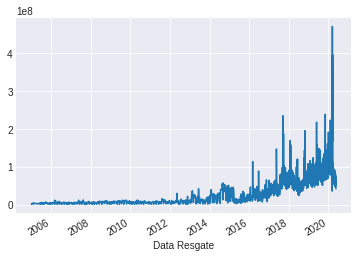

In [ ]:
recompras['Valor'].groupby('Data Resgate').sum().plot();

###4.2 Recompras diárias Tesouro Selic 2025

In [ ]:
recompras_selic = recompras.loc[('Tesouro Selic', '2025-03-01')]

In [ ]:
fig = px.bar(data_frame=recompras_selic,  x=recompras_selic.index, y='Valor', labels={'x':'Data'})
fig.show()

In [ ]:
recompras_selic_semanal = recompras_selic.resample('W').sum()

In [ ]:
fig = px.bar(data_frame=recompras_selic_semanal,  x=recompras_selic_semanal.index, y='Valor' )
fig.show()

###4.3 Resgastes Tesouro Selic vs Índice Bovespa

In [ ]:
ibov = yf.download('^BVSP')['Adj Close'].resample('W').last().pct_change()[1:]

In [ ]:
selic_ibov = pd.concat([recompras_selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

Recompra(%)   IBOV(%)
Date                             
2019-02-24     0.236251  0.003691
2019-03-03     0.423072 -0.033529
2019-03-10    -0.219953  0.008044
2019-03-17     1.231367  0.039553
2019-03-24     0.179772 -0.054490
2019-03-31     0.579274  0.017923
2019-04-07    -0.185600  0.017744
2019-04-14     0.124599 -0.043591
2019-04-21     0.030708  0.018336
2019-04-28     0.232518  0.017531
...                 ...       ...
2020-03-22     0.848841 -0.188793
2020-03-29    -0.552286  0.094828
2020-04-05    -0.503418 -0.052990
2020-04-12    -0.106493  0.117116
2020-04-19     0.079916  0.016838
2020-04-26    -0.088002 -0.046322
2020-05-03     0.263718  0.068697
2020-05-10    -0.048104 -0.003018
2020-05-17     0.095632 -0.033714
2020-05-24    -0.484383  0.059518

[66 rows x 2 columns]

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Recompras Selic(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)']),
    go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)']),
])
fig.update_layout(barmode='group')
fig.show()

In [ ]:
selic_ibov.corr()

Recompra(%)   IBOV(%)
Recompra(%)     1.000000 -0.309419
IBOV(%)        -0.309419  1.000000